# 2021-08-25: Numerical differentiation

This activity will explore numerical approximation of derivatives using methods of the form
$$ f'(x) \approx \frac{f(x+h) - f(x)}{h} $$
for some small $h > 0$.

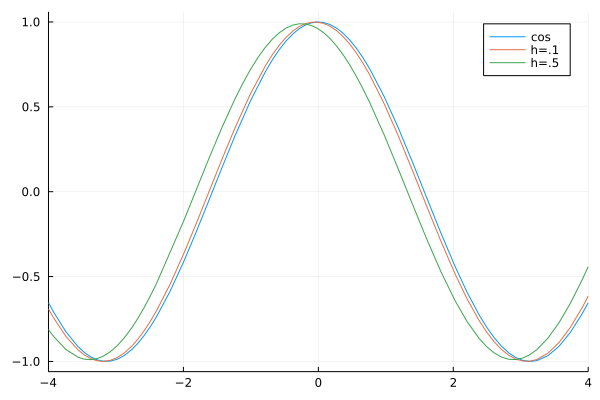

In [2]:
using LinearAlgebra
using Plots

function diff(f, x, h)
    (f.(x .+ h) - f.(x)) / h
end

plot([cos,
      x -> diff(sin, x, .1),
      x -> diff(sin, x, .5)],
    label=["cos" "h=.1" "h=.5"],
    xlims=(-4, 4))

The $h=0.1$ dots appear to be more accurate than $h=0.4$, which is a good sign.
To be quantitative, let's examine how the error (taken to be the maximum error on a set of sample points) depends on the parameter $h$.

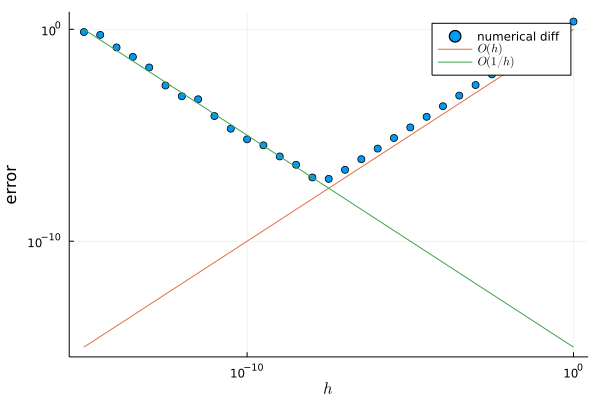

In [3]:
function compute_errors(diff, f, fprime; x=LinRange(-4, 4, 50))
    hs = 10. .^ (-15:.5:0)
    errors = [norm(diff(f, x, h) - fprime.(x)) for h in hs]
    hs, errors
end

hs, errors = compute_errors(diff, sin, cos)
scatter(hs, errors, label="numerical diff",
    xlabel="\$h\$", ylabel="error", xscale=:log10, yscale=:log10)
plot!(hs, hs, label="\$O(h)\$")
plot!(hs, 1e-15 ./ hs, label="\$O(1/h)\$")

Evidently the error behaves like $O(h)$ for large values of $h$ and like $O(1/h)$ for small values of $h$.  To minimize error, we should choose a value of $h \approx 10^{-8}$ in this case, but the specific choice depends on the function.

We can do similar experiments for the "centered" formula
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

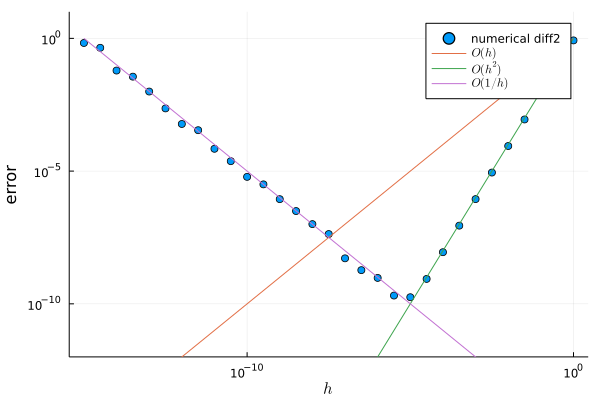

In [4]:
function diff2(f, x, h)
    (f.(x .+ h) - f.(x .- h)) / (2*h)
end

hs, errors = compute_errors(diff2, sin, cos)
scatter(hs, errors, label="numerical diff2",
    xlabel="\$h\$", ylabel="error",
    xscale=:log10, yscale=:log10, ylims=(1e-12, 10))
plot!(hs, hs, label="\$O(h)\$")
plot!(hs, hs.^2, label="\$O(h^2)\$")
plot!(hs, 1e-15 ./ hs, label="\$O(1/h)\$")

Now, we consider the effect of shifting from comparing accuracy on the interval $(-4, 4)$ to the interval $(10^5\pi - 4, 10^5\pi + 4)$. Note that our test function $f(x) = \sin x$ is $2\pi$ periodic.

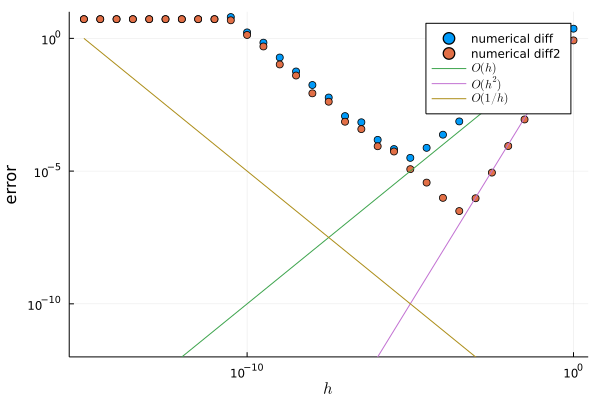

In [5]:
hs, errors1 = compute_errors(diff,  sin, cos, x=1e5*pi.+LinRange(-4, 4, 50))
_,  errors2 = compute_errors(diff2, sin, cos, x=1e5*pi.+LinRange(-4, 4, 50))
scatter(hs, errors1, label="numerical diff",
    xlabel="\$h\$", ylabel="error",
    xscale=:log10, yscale=:log10, ylims=(1e-12, 10))
scatter!(hs, errors2, label="numerical diff2")
plot!(hs, hs, label="\$O(h)\$")
plot!(hs, hs.^2, label="\$O(h^2)\$")
plot!(hs, 1e-15 ./ hs, label="\$O(1/h)\$")


## Estimate constants

Suppose you are given two positive values $h_0$ and $h_1$ as well as two errors $e_0 = e(h_0)$ and $e_1 = e(h_1)$.
Use the ratios $h_1 / h_0$ and $e_1 / e_0$ to estimate $p$ assuming the form $e(h) = c h^p$.

Hint: take ratios of the equations and use $\log$ (`log`).

In [6]:
function convergence_order(h0, e0, h1, e1)
    hratio = h1/h0
    eratio = e1/e0
    ## BEGIN SOLUTION
    log(eratio) / log(hratio)
    ## END SOLUTION
end

convergence_order(hs[end-6], errors1[end-6], hs[end-7], errors1[end-7])

0.9999807059157422

In [7]:
@assert abs(convergence_order(hs[end-5], errors1[end-5], hs[end-7], errors1[end-7]) - 1) < 1e-4
@assert abs(convergence_order(hs[end-4], errors2[end-4], hs[end-3], errors2[end-3]) - 2) < 1e-4